catboost


0:	total: 206ms	remaining: 3m 25s
100:	total: 23.2s	remaining: 3m 26s
200:	total: 45.1s	remaining: 2m 59s
300:	total: 1m 7s	remaining: 2m 35s
400:	total: 1m 26s	remaining: 2m 9s
500:	total: 1m 47s	remaining: 1m 47s
600:	total: 2m 7s	remaining: 1m 24s
700:	total: 2m 27s	remaining: 1m 2s
800:	total: 2m 49s	remaining: 42.2s
900:	total: 3m 9s	remaining: 20.8s
999:	total: 3m 30s	remaining: 0us
Accuracy: 0.9743
ROC AUC: 0.9923
F1 Score: 0.9736
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1519
           1       1.00      0.95      0.97      1519

    accuracy                           0.97      3038
   macro avg       0.98      0.97      0.97      3038
weighted avg       0.98      0.97      0.97      3038



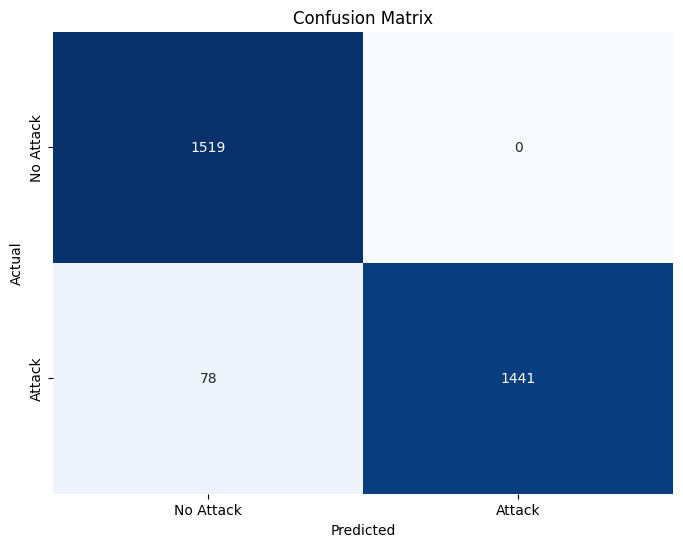

<Figure size 800x600 with 0 Axes>

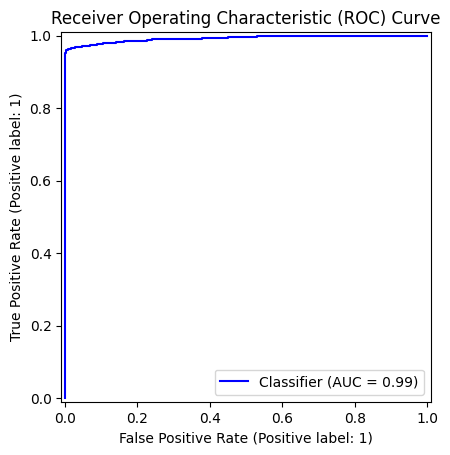

In [ ]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report, confusion_matrix, RocCurveDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Dataset
data = pd.read_csv('/content/cs2.csv')

# Step 2: Data Cleaning
data_cleaned = data.dropna(subset=['login_attempts_count', 'failed_attempts_count', 'previous_attack_history'])
data_cleaned = data_cleaned[data_cleaned['failed_attempts_count'] <= data_cleaned['login_attempts_count']]
data_cleaned = data_cleaned[(data_cleaned['login_attempts_count'] >= 1) & (data_cleaned['login_attempts_count'] <= 20)]
data_cleaned = data_cleaned[(data_cleaned['failed_attempts_count'] >= 0) & (data_cleaned['failed_attempts_count'] <= 10)]
data_cleaned = data_cleaned[(data_cleaned['time_between_attempts'] >= 0.1) & (data_cleaned['time_between_attempts'] <= 10)]

# Step 3: Define Features and Target Variable
X = data_cleaned.drop(columns=['user_id', 'previous_attack_history'])
y = data_cleaned['previous_attack_history']

# One-hot encode categorical variables if necessary
X = pd.get_dummies(X, drop_first=True)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Step 4: Create and Train the CatBoost Model
catboost_model = CatBoostClassifier(
    iterations=1000,
    depth=10,
    learning_rate=0.1,
    loss_function='Logloss',
    eval_metric='AUC',
    random_seed=42,
    verbose=100
)

# Fit the model to the training data
catboost_model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred_proba = catboost_model.predict_proba(X_test)[:, 1]  # Probability of positive class
y_pred = catboost_model.predict(X_test)  # Class predictions

# Step 6: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 7: Plotting

# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Attack', 'Attack'], yticklabels=['No Attack', 'Attack'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(y_test, y_pred_proba, color='blue')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()




xgboost

Accuracy: 0.9756
ROC AUC: 0.9950
F1 Score: 0.9753
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1518
           1       0.99      0.96      0.98      1518

    accuracy                           0.98      3036
   macro avg       0.98      0.98      0.98      3036
weighted avg       0.98      0.98      0.98      3036



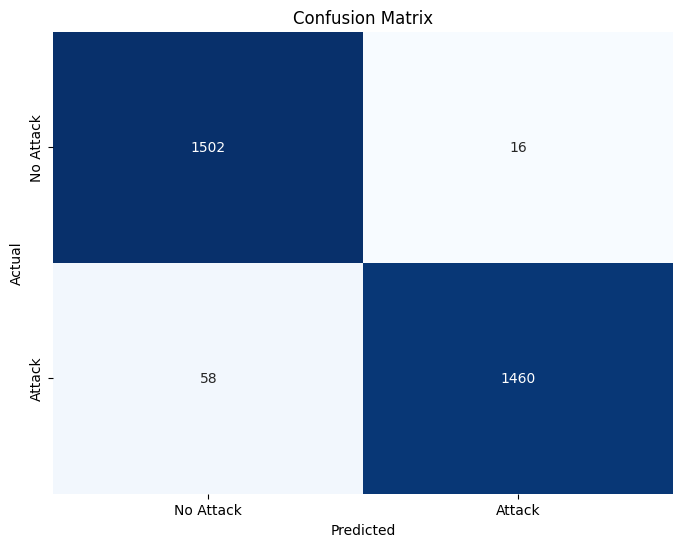

<Figure size 800x600 with 0 Axes>

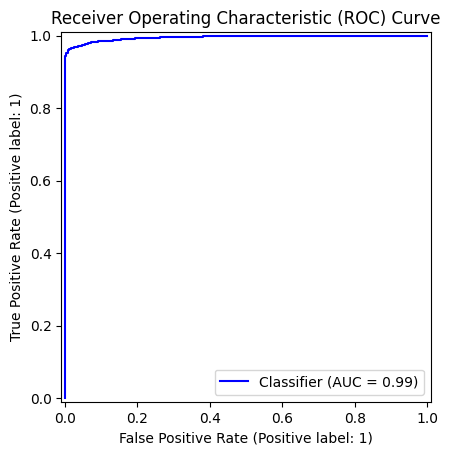

In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report, confusion_matrix, RocCurveDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Dataset
data = pd.read_csv('/content/cs2.csv')

# Step 2: Data Cleaning
data_cleaned = data.dropna(subset=['login_attempts_count', 'failed_attempts_count', 'previous_attack_history'])
data_cleaned = data_cleaned[data_cleaned['failed_attempts_count'] <= data_cleaned['login_attempts_count']]
data_cleaned = data_cleaned[(data_cleaned['login_attempts_count'] >= 1) & (data_cleaned['login_attempts_count'] <= 20)]
data_cleaned = data_cleaned[(data_cleaned['failed_attempts_count'] >= 0) & (data_cleaned['failed_attempts_count'] <= 10)]
data_cleaned = data_cleaned[(data_cleaned['time_between_attempts'] >= 0.1) & (data_cleaned['time_between_attempts'] <= 10)]

# Step 3: Define Features and Target Variable
X = data_cleaned.drop(columns=['user_id', 'previous_attack_history'])
y = data_cleaned['previous_attack_history']

# One-hot encode categorical variables if necessary
X = pd.get_dummies(X, drop_first=True)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Step 4: Create and Train the XGBoost Model
xgboost_model = XGBClassifier(
    eval_metric='logloss',
    n_estimators=1000,
    max_depth=10,
    learning_rate=0.1,
    subsample=0.8,
    random_state=42
)

# Fit the model to the training data
xgboost_model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred_proba = xgboost_model.predict_proba(X_test)[:, 1]  # Probability of positive class
y_pred = xgboost_model.predict(X_test)  # Class predictions

# Step 6: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 7: Plotting

# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Attack', 'Attack'], yticklabels=['No Attack', 'Attack'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(y_test, y_pred_proba, color='blue')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()





lstm

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.5406 - loss: 0.6766 - val_accuracy: 0.6424 - val_loss: 0.6208
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7949 - loss: 0.4883 - val_accuracy: 0.9735 - val_loss: 0.4047
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9974 - loss: 0.0915 - val_accuracy: 0.9338 - val_loss: 0.2888
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9980 - loss: 0.0092 - val_accuracy: 0.9073 - val_loss: 0.3037
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.9007 - val_loss: 0.3135
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9007 - val_loss: 0.3172
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.8940 - val_loss: 0.3243
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 8.6467e-04 - val_accuracy: 0.8940 - val_loss

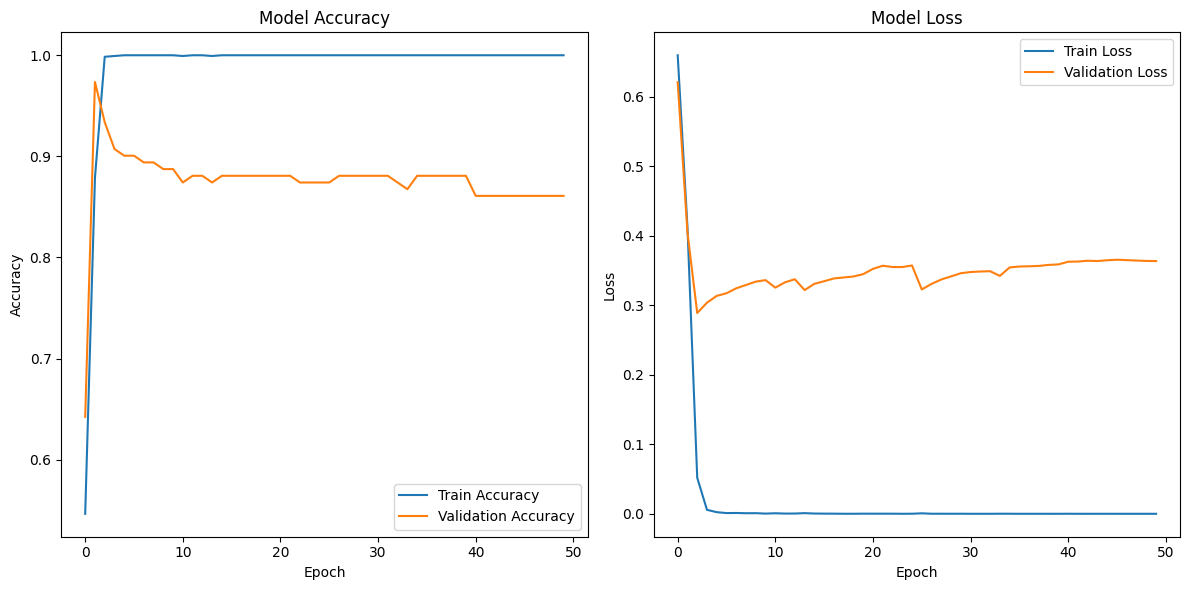

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
data = pd.read_csv('/content/cs2.csv')

# Step 2: Data Cleaning
data_cleaned = data.dropna(subset=['login_attempts_count', 'failed_attempts_count', 'previous_attack_history'])
data_cleaned = data_cleaned[data_cleaned['failed_attempts_count'] <= data_cleaned['login_attempts_count']]
data_cleaned = data_cleaned[(data_cleaned['login_attempts_count'] >= 1) & (data_cleaned['login_attempts_count'] <= 20)]
data_cleaned = data_cleaned[(data_cleaned['failed_attempts_count'] >= 0) & (data_cleaned['failed_attempts_count'] <= 10)]
data_cleaned = data_cleaned[(data_cleaned['time_between_attempts'] >= 0.1) & (data_cleaned['time_between_attempts'] <= 10)]

# Step 3: Define Features and Target Variable
X = data_cleaned.drop(columns=['user_id', 'previous_attack_history'])
y = data_cleaned['previous_attack_history']

# One-hot encode categorical variables if necessary
X = pd.get_dummies(X, drop_first=True)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 4: Scale Features
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Step 5: Reshape the Data for LSTM
# LSTM requires 3D input: (samples, timesteps, features)
# Here, we can treat each sample as a sequence with a single timestep
X_reshaped = X_resampled_scaled.reshape(X_resampled_scaled.shape[0], 1, X_resampled_scaled.shape[1])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Step 6: Create and Train the LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
lstm_model.add(Dropout(0.2))  # Adding dropout to prevent overfitting
lstm_model.add(LSTM(50, activation='relu'))  # Second LSTM layer
lstm_model.add(Dropout(0.2))  # Adding dropout
lstm_model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model to the training data and store the training history
history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Step 7: Make Predictions
y_pred_proba = lstm_model.predict(X_test)  # Probability of positive class
y_pred = (y_pred_proba > 0.5).astype(int).flatten()  # Class predictions

# Step 8: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 9: Plotting Accuracy and Loss
# Plotting training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()
